In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import pandas as pd

import eda
import clf

from joblib import dump, load


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
df_tr = pd.read_csv('df_CCF_tr.csv')
df_val = pd.read_csv('df_CCF_val.csv')
df_ts = pd.read_csv('df_CCF_ts.csv')
tr_val = [df_tr, df_val]

df_tr.shape, df_val.shape, df_ts.shape

((170884, 31), (56961, 31), (56962, 31))

### TRAINING:

In [ ]:
parameter_dict = dict(n_estimators = [50],
                         criterion = ['entropy'],
                         max_depth = [None],
                 min_samples_split = range(2, 20, 3),
                  min_samples_leaf = range(1, 20, 3),
                      max_features = [4],
                      class_weight = ['balanced'],
                      random_state = [8])


clf.fn_param_grid_size(parameter_dict)

42

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_class = RandomForestClassifier
df_Xy = df_tr

trained_models = clf.fn_train_models(df_Xy, model_class, parameter_dict)

100% |########################################################################|


### MODEL PERFORMANCES CURVES:

'successful'

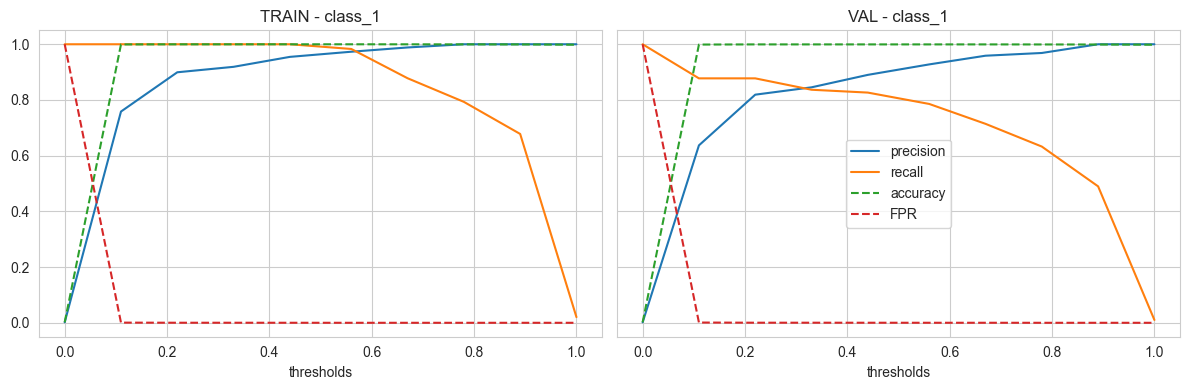

In [ ]:
model_n = 3
trained_model = trained_models[model_n]

clf.fn_model_curves(trained_model, tr_val)

'successful'

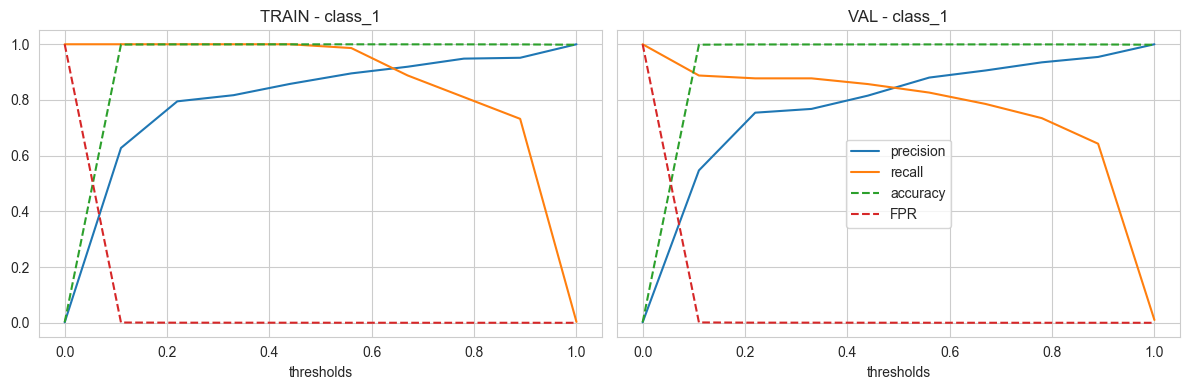

In [ ]:
model_n = 12
trained_model = trained_models[model_n]

clf.fn_model_curves(trained_model, tr_val)

'successful'

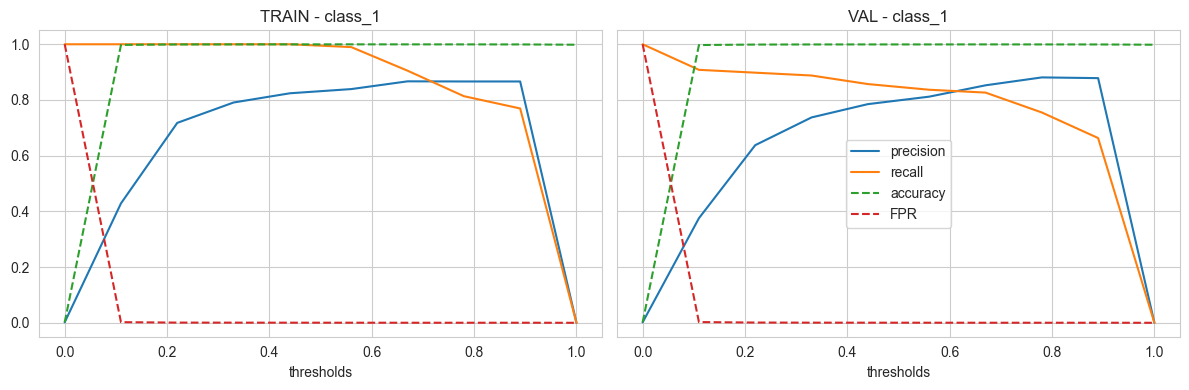

In [ ]:
model_n = 25
trained_model = trained_models[model_n]

clf.fn_model_curves(trained_model, tr_val)

'successful'

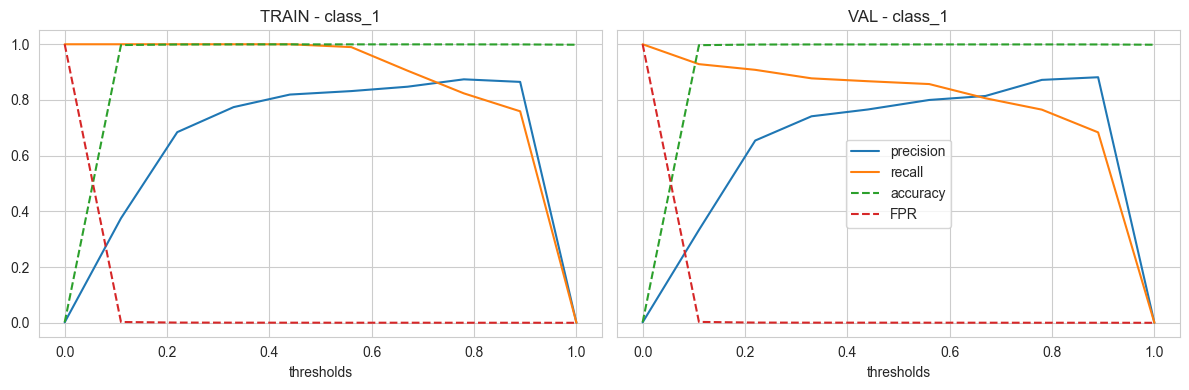

In [ ]:
model_n = 35
trained_model = trained_models[model_n]

clf.fn_model_curves(trained_model, tr_val)

### TESTING THE MODEL:
**(WE CHOOSE MODEL 12 AND USE A PREDICTION THRESHOLD OF 0.7)

In [ ]:
df_Xy = df_tr

trained_model = trained_models[12]
threshold = 0.7

y_pred_tr = clf.fn_test_model_binary_clf(df_Xy, trained_model,
                                         threshold_class_1 = threshold)

-------------------------------------
LOGLOSS : 0.0019
ACCURACY: 1.0
-------------------------------------
          prec    rec  f1_score
class_0  99.98  99.99    99.985
class_1  93.38  86.10    89.592


In [ ]:
df_Xy = df_val

y_pred_ts = clf.fn_test_model_binary_clf(df_Xy, trained_model,
                                         threshold_class_1 = threshold)

-------------------------------------
LOGLOSS : 0.0069
ACCURACY: 1.0
-------------------------------------
          prec    rec  f1_score
class_0  99.96  99.99    99.975
class_1  91.46  76.53    83.332


In [ ]:
df_Xy = df_ts

y_pred_ts = clf.fn_test_model_binary_clf(df_Xy, trained_model,
                                         threshold_class_1 = threshold)

-------------------------------------
LOGLOSS : 0.0092
ACCURACY: 1.0
-------------------------------------
          prec     rec  f1_score
class_0  99.96  100.00    99.980
class_1  97.44   76.77    85.879


### SAVING THE MODEL:

In [ ]:
from joblib import dump, load
dump(trained_models[12], 'model_randforest_whole_data.joblib')